In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
file_path = r'D:\PG_DS\ML\DT_Test\Test_Sales_LinReg.csv'

sales = pd.read_csv(file_path)

In [7]:
sales.head(5)

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [8]:
sales.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnyan\AppData\Local\Temp\ipykernel_18388\1686108094.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


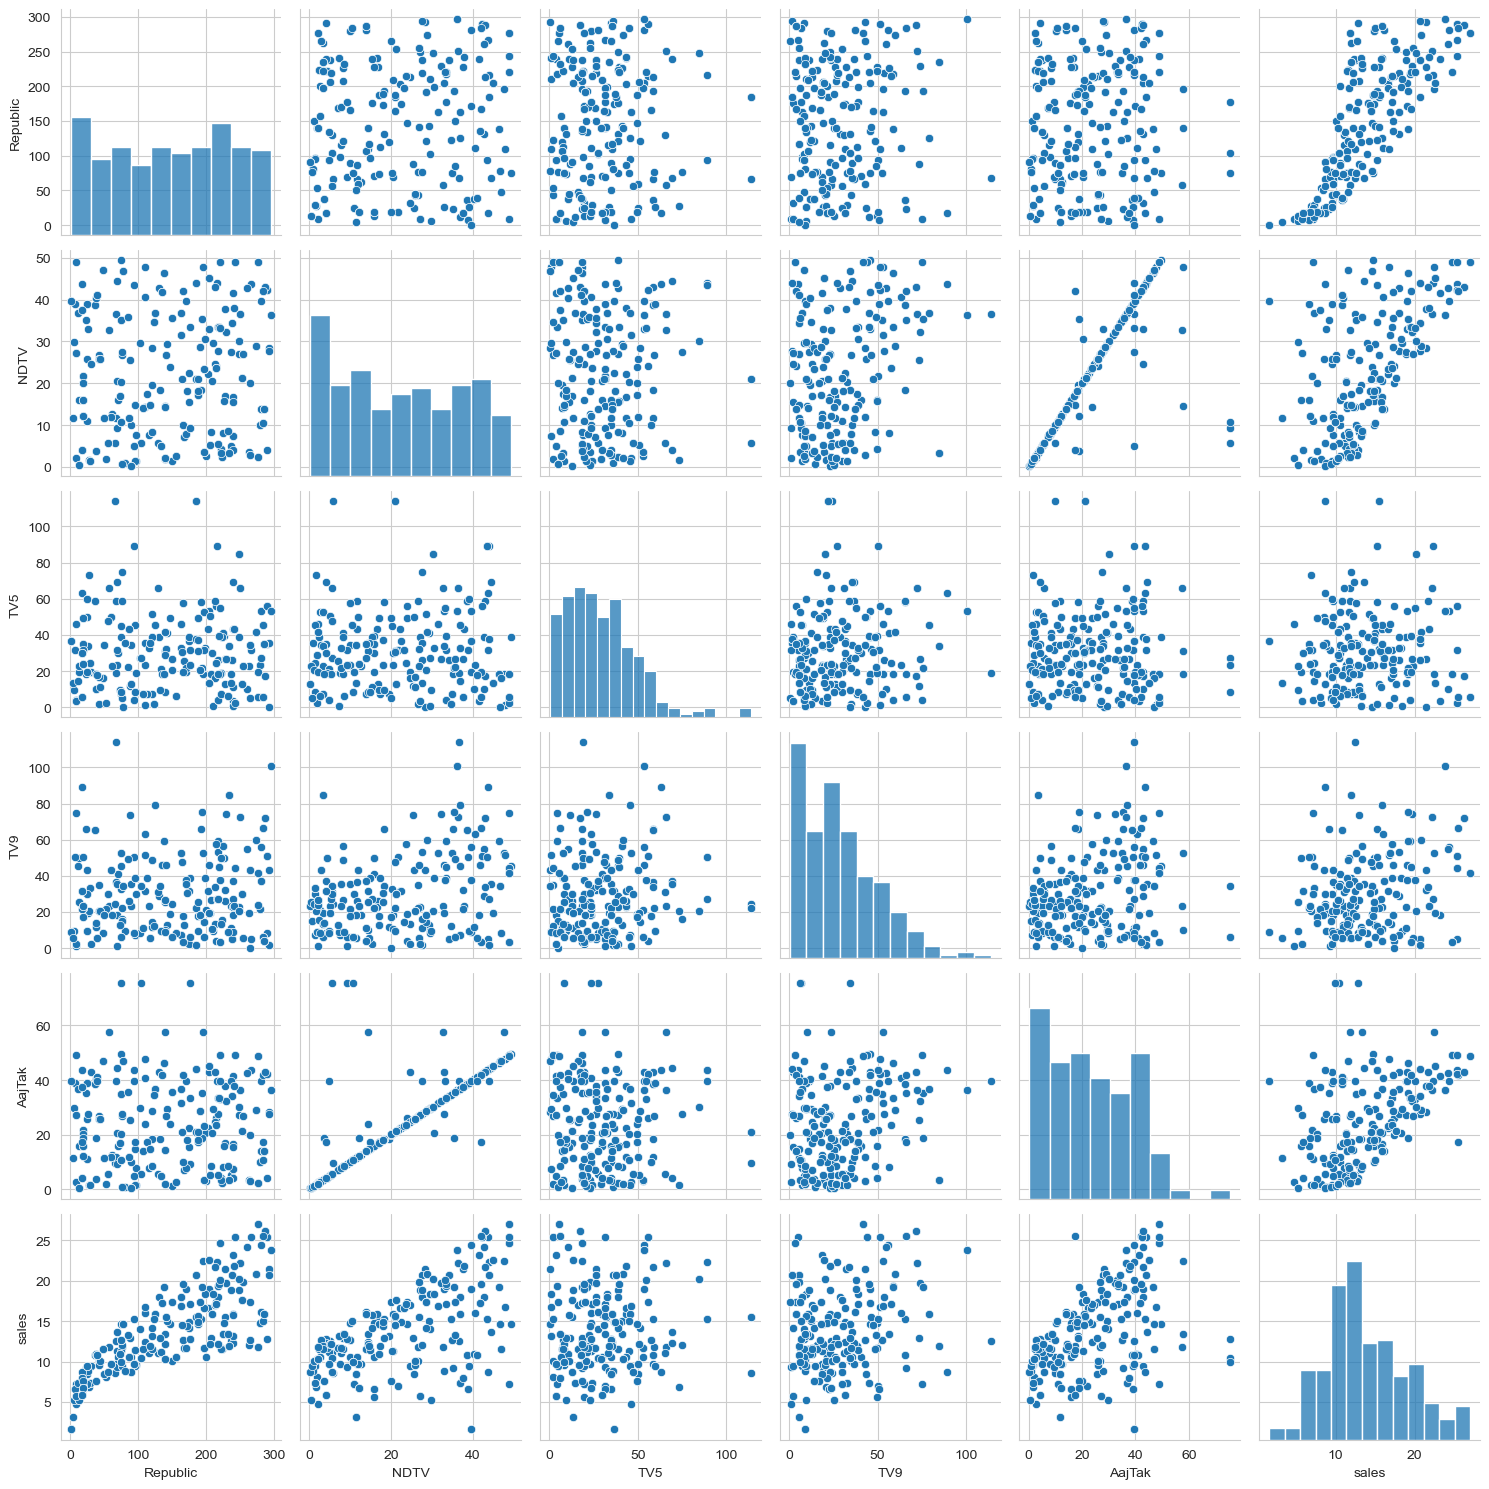

In [20]:
sns.set_style('whitegrid')
sns.pairplot(sales)

<Axes: >

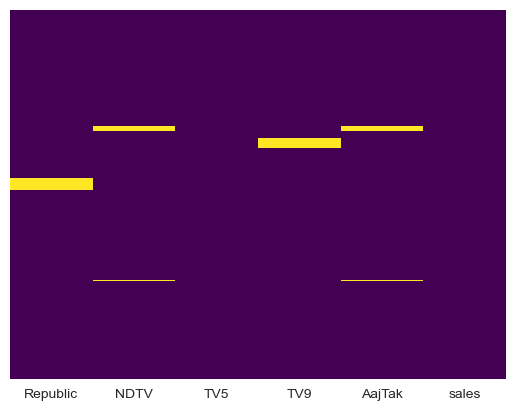

In [15]:
sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
sales_c=sales.fillna(sales.mean())

<Axes: >

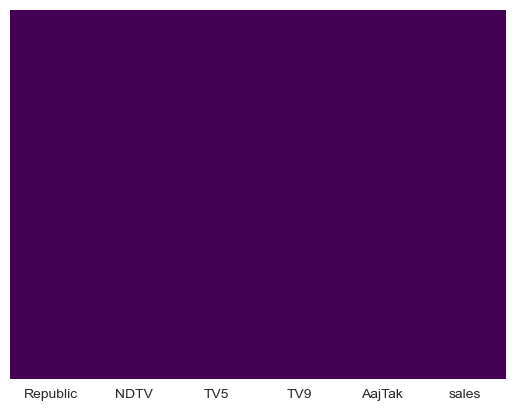

In [17]:
sns.heatmap(sales_c.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
sales_c.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [19]:
sales.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [21]:
y = sales_c['sales']

In [22]:
X = sales_c.drop('sales',axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=157)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm_ad = LinearRegression()

In [27]:
lm_ad.fit(X_train,y_train)

LinearRegression()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
lm_ad_s = LinearRegression()

In [34]:
lm_ad_s.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
sales_p_s = lm_ad.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, sales_p_s, squared=False)
r_squared = r2_score(y_test, sales_p_s)


In [37]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error (RMSE): 11.682347719665469
R-squared: -4.222165503862946


In [38]:
sales_p=lm_ad.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

rmse1 = mean_squared_error(y_test, sales_p, squared=False)
r_squared1 = r2_score(y_test, sales_p)

In [41]:
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared:", r_squared1)

Root Mean Squared Error (RMSE): 2.168514007461109
R-squared: 0.8200653357306847


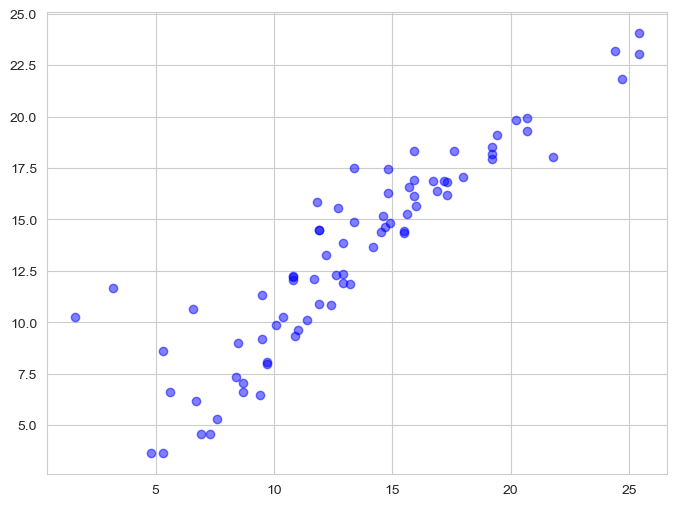

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sales_p, color='blue', alpha=0.5)  

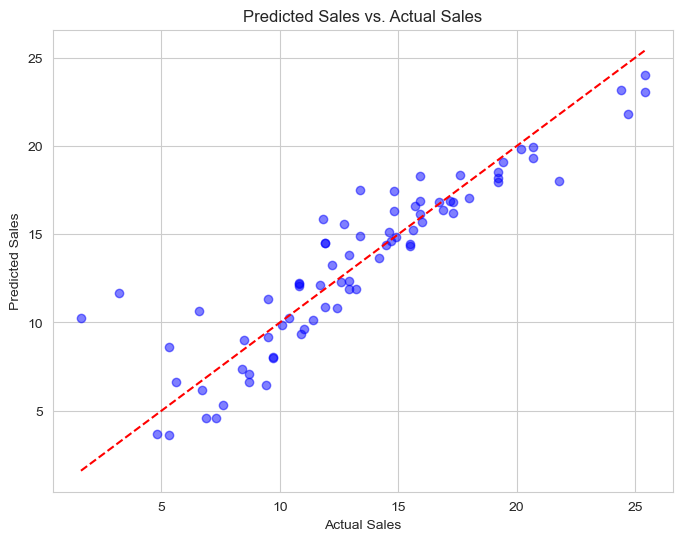

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sales_p, color='blue', alpha=0.5)  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Predicted Sales vs. Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()